In [2]:
from os import listdir
from os.path import isfile, join
import numpy as np
import seaborn as sns

# EOLearn libraries:
from eolearn.core import EOTask, EOPatch, LinearWorkflow, LoadTask, SaveTask, FeatureType, EOExecutor
from eolearn.core import OverwritePermission

# Add to python path parent dictionary (to have acces to the data and util catalogue)
import sys
sys.path.append("../../")

# load site dependant constants (HERE YOU CAN CHOOSE DIFFERENT LOCATION)
from aoi_sites import upe_promice_area as site

# load utility functions
from utils import io_functions as io_utils
from utils import plot_functions as plot_utils

In [125]:
CHOSEN_DATE_RANGE = site.DATE_RANGES_LANDSAT_8[0]
DATETIME_ID = 2
EO_PATCH_NAME = '2969_maxcc_0.05_x-3_y-130'

PATCH_FILEPATH = io_utils.get_eopatches_dir(site.DATA_PRODUCTS[1], site.SITE_NAME, site.AVAILABLE_CRSs[0], CHOSEN_DATE_RANGE)

In [5]:
eo_patch = EOPatch.load(PATCH_FILEPATH+EO_PATCH_NAME)
eo_patch

EOPatch(
  data: {
    LANDSAT_EUC_NORM_RAW_BANDS: numpy.ndarray(shape=(9, 333, 333, 1), dtype=float32)
    LANDSAT_NDWI: numpy.ndarray(shape=(9, 333, 333, 1), dtype=float32)
    LANDSAT_NDWI_GREEN_NIR: numpy.ndarray(shape=(9, 333, 333, 1), dtype=float32)
    LANDSAT_NDWI_ICE: numpy.ndarray(shape=(9, 333, 333, 1), dtype=float32)
    LANDSAT_NDWI_NIR_SWIR_1: numpy.ndarray(shape=(9, 333, 333, 1), dtype=float32)
    LANDSAT_NDWI_NIR_SWIR_2: numpy.ndarray(shape=(9, 333, 333, 1), dtype=float32)
    LANDSAT_QA_LAYERS: numpy.ndarray(shape=(9, 333, 333, 5), dtype=float32)
    LANDSAT_RAW_BANDS: numpy.ndarray(shape=(9, 333, 333, 11), dtype=float32)
    MODIS_EUC_NORM_RAW_BANDS: numpy.ndarray(shape=(9, 333, 333, 1), dtype=float32)
    MODIS_NDWI: numpy.ndarray(shape=(9, 333, 333, 1), dtype=float32)
    MODIS_NRB: numpy.ndarray(shape=(9, 333, 333, 1), dtype=float32)
    MODIS_RAW_BANDS_DAY_0: numpy.ndarray(shape=(9, 333, 333, 7), dtype=float32)
    MODIS_RAW_BANDS_DAY_AFTER: numpy.ndarray(shape=(

In [ ]:
slope=calculate_slope('DEM.tif')
aspect=calculate_aspect('DEM.tif')

print(type(slope))
print(slope.dtype)
print(slope.shape)

In [7]:
eopatch_dem = eo_patch.data_timeless['DEM_RAW_LAYER']

In [14]:
import matplotlib.pyplot as plt
def plot_matrix(eopatch_dem):
    fig = plt.figure(figsize=(10, 10)) 
    plt.imshow(eopatch_dem.squeeze())
    plt.xticks([])
    plt.yticks([])
    return

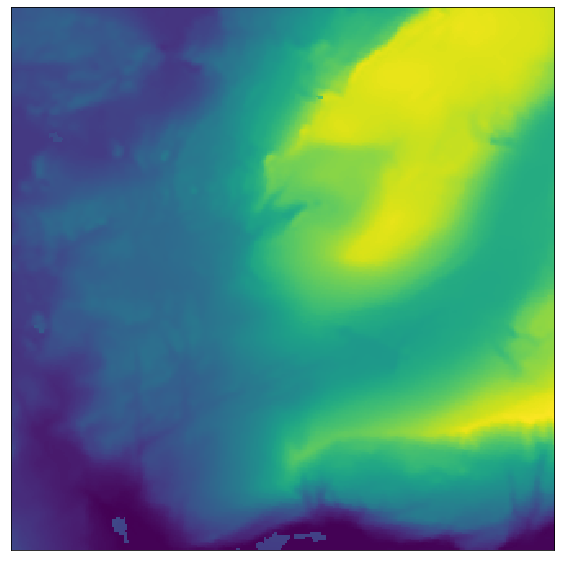

In [15]:
plot_matrix(eopatch_dem)

In [25]:
new_dataset = rasterio.open('DEM.tif', 'w', driver='GTiff',
                            height = eopatch_dem.shape[0], width = eopatch_dem.shape[1],
                            count=1, dtype=str(eopatch_dem.dtype),
                            )
new_dataset.write(eopatch_dem.squeeze(), 1)
new_dataset.close()

In [26]:
from osgeo import gdal
import numpy as np
import rasterio


def calculate_slope(DEM):
    gdal.DEMProcessing('slope.tif', DEM, 'slope')
    with rasterio.open('slope.tif') as dataset:
        slope=dataset.read(1)
    return slope

def calculate_aspect(DEM):
    gdal.DEMProcessing('aspect.tif', DEM, 'aspect')
    with rasterio.open('aspect.tif') as dataset:
        aspect=dataset.read(1)
    return aspect

slope=calculate_slope('DEM.tif')
aspect=calculate_aspect('DEM.tif')

print(type(slope))
print(slope.dtype)
print(slope.shape)

<class 'numpy.ndarray'>
float32
(333, 333)


In [28]:
slope

array([[-9999.      , -9999.      , -9999.      , ..., -9999.      ,
        -9999.      , -9999.      ],
       [-9999.      ,    79.41313 ,    81.10021 , ...,    67.19467 ,
           58.467888, -9999.      ],
       [-9999.      ,    72.57888 ,    78.64155 , ...,    69.16712 ,
           58.467888, -9999.      ],
       ...,
       [-9999.      ,    77.981255,    83.25831 , ...,     0.      ,
            0.      , -9999.      ],
       [-9999.      ,    76.61344 ,    82.51949 , ...,     0.      ,
            0.      , -9999.      ],
       [-9999.      , -9999.      , -9999.      , ..., -9999.      ,
        -9999.      , -9999.      ]], dtype=float32)

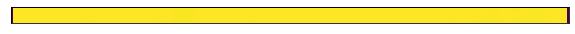

In [29]:
plot_matrix(slope[:10])

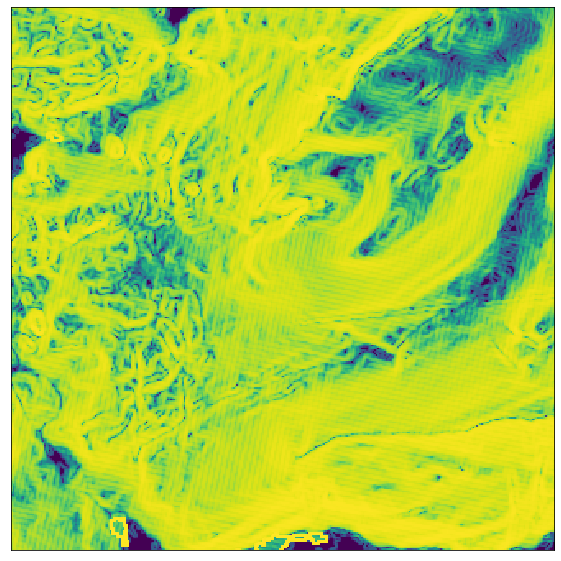

In [37]:
plot_matrix(slope[1:332,1:332])

In [36]:
slope[1:332,1:332]

array([[79.41313 , 81.10021 , 79.263145, ..., 63.6122  , 67.19467 ,
        58.467888],
       [72.57888 , 78.64155 , 77.80385 , ..., 67.417564, 69.16712 ,
        58.467888],
       [57.849022, 68.58328 , 71.59482 , ..., 68.58328 , 70.97046 ,
        63.434948],
       ...,
       [78.29115 , 83.49989 , 83.28152 , ..., 27.938353, 10.024988,
         0.      ],
       [77.981255, 83.25831 , 83.24514 , ..., 10.024988,  0.      ,
         0.      ],
       [76.61344 , 82.51949 , 82.82277 , ...,  0.      ,  0.      ,
         0.      ]], dtype=float32)

#### 1. Set up and execute EOWorkflow

In [122]:
from osgeo import gdal
import numpy as np
import rasterio

def process_dem(DEM='DEM.tif', processing_product='slope'):
    gdal.DEMProcessing(processing_mode+'.tif', DEM, processing_mode )
    with rasterio.open(processing_mode+'.tif') as dataset:
        product=dataset.read(1)
    return product

slope=process_dem(DEM='DEM.tif', processing_product = 'slope')
aspect=process_dem(DEM='DEM.tif', processing_product = 'slope')
#aspect=calculate_aspect('DEM.tif')

#print(type(slope))
#print(slope.dtype)
#print(slope.shape)

# defining eo_task for DEM slope calculation
import numpy.ma as ma
class DEMSlopeCalculation(EOTask):   
    """
    The tasks produces DEM slope calculation with gdal and rasterio library:
    """
    def __init__(self, input_feature_name='DEM_RAW_LAYER', output_feature_name='DEM_SLOPE_LAYER' , output_mask_name='DEM_SLOPE_MASK', mask_range = 1, mode='slope'):
        self.input_feature_name = input_feature_name
        self.output_feature_name = output_feature_name
        self.output_mask_name = output_mask_name
        self.mask_range = mask_range
        #processing --- one of "hillshade", "slope", "aspect", "color-relief", "TRI", "TPI", "Roughness"
        self.mode = mode
        
    def execute(self, eopatch):
        
        # extract DEM LAYER from EOPatch:
        dem_band = eopatch.data_timeless[self.input_feature_name][..., 0]
        
        # create rasterio shadow dataset reference that is needed to perform gdal.
        new_dataset = rasterio.open('DEM.tif', 'w', driver='GTiff',
                            height = dem_band.shape[0], width = dem_band.shape[1],
                            count=1, dtype=str(eopatch_dem.dtype)
                            )
        new_dataset.write(dem_band, 1)
        new_dataset.close()
        
        # process eopatch and save results:
        slope=process_dem('DEM.tif', processing_product = self.mode )
        eopatch.add_feature(FeatureType.DATA_TIMELESS, self.output_feature_name, slope[..., np.newaxis])

        # produce timeless frame mask
        mask = np.full(dem_band.shape, False) # create a mask with the image's shape         
        mask[self.mask_range:-self.mask_range,self.mask_range:-self.mask_range] = True 
        # save mask
        eopatch.add_feature(FeatureType.MASK_TIMELESS, self.output_mask_name, mask[..., np.newaxis])
        
        return eopatch

#### 2. Set up and execute EOWorkflow

In [129]:
# creating eo tasks producing DEM slope and mask from DEM layer
calculate_DEM_slope_eotask = DEMSlopeCalculation()

for date_range_landsat in site.DATE_RANGES_LANDSAT_8 :
    print('Reading EOPatches from:', date_range_landsat )
    eopatches_filepath = io_utils.get_eopatches_dir(site.DATA_PRODUCTS[1], site.SITE_NAME, site.AVAILABLE_CRSs[0], date_range_landsat)
    # TASK TO LOAD AND SAVE EXISTING EOPATCHES HAS TO BE CREATED YEARLY (different directories)
    load_eotask = LoadTask(eopatches_filepath)
    save_eotask = SaveTask(eopatches_filepath, overwrite_permission=OverwritePermission.OVERWRITE_PATCH, compress_level=1)
    
    # Define the workflow
    workflow = LinearWorkflow(
    load_eotask,
    calculate_DEM_slope_eotask,
    save_eotask
    )
                      
    list_of_available_patches = io_utils.get_list_of_eopatches(eopatches_filepath)
    execution_args = []
    for eopatch_name in list_of_available_patches:
        execution_args.append({
        load_eotask: {'eopatch_folder': eopatch_name},
        save_eotask: {'eopatch_folder': eopatch_name}
        })
    
    #print(execution_args)                            
    executor = EOExecutor(workflow, execution_args, save_logs=True)
    executor.run(workers=1, multiprocess=False)

    executor.make_report()


Reading EOPatches from: ('2013-05-01', '2013-10-31')


C:\Users\Kamil\Anaconda3\lib\site-packages\rasterio\__init__.py:225: NotGeoreferencedWarning: Dataset has no geotransform set. The identity matrix may be returned.
  **kwargs)



Reading EOPatches from: ('2014-05-01', '2014-10-31')



Reading EOPatches from: ('2015-05-01', '2015-10-31')



Reading EOPatches from: ('2016-05-01', '2016-10-31')



Reading EOPatches from: ('2017-05-01', '2017-10-31')



Reading EOPatches from: ('2018-05-01', '2018-10-31')



Reading EOPatches from: ('2019-05-01', '2019-10-31')


In [ ]:
# creating eo tasks producing DEM slope and mask from DEM layer
calculate_DEM_aspect_eotask = DEMSlopeCalculation( mode = 'aspect')

for date_range_landsat in site.DATE_RANGES_LANDSAT_8 :
    print('Reading EOPatches from:', date_range_landsat )
    eopatches_filepath = io_utils.get_eopatches_dir(site.DATA_PRODUCTS[1], site.SITE_NAME, site.AVAILABLE_CRSs[0], date_range_landsat)
    # TASK TO LOAD AND SAVE EXISTING EOPATCHES HAS TO BE CREATED YEARLY (different directories)
    load_eotask = LoadTask(eopatches_filepath)
    save_eotask = SaveTask(eopatches_filepath, overwrite_permission=OverwritePermission.OVERWRITE_PATCH, compress_level=1)
    
    # Define the workflow
    workflow = LinearWorkflow(
    load_eotask,
    calculate_DEM_slope_eotask,
    save_eotask
    )
                      
    list_of_available_patches = io_utils.get_list_of_eopatches(eopatches_filepath)
    execution_args = []
    for eopatch_name in list_of_available_patches:
        execution_args.append({
        load_eotask: {'eopatch_folder': eopatch_name},
        save_eotask: {'eopatch_folder': eopatch_name}
        })
    
    #print(execution_args)                            
    executor = EOExecutor(workflow, execution_args, save_logs=True)
    executor.run(workers=1, multiprocess=False)

    executor.make_report()


In [126]:
eo_patch = EOPatch.load(PATCH_FILEPATH+EO_PATCH_NAME)
eo_patch

EOPatch(
  data: {
    LANDSAT_EUC_NORM_RAW_BANDS: numpy.ndarray(shape=(7, 333, 333, 1), dtype=float32)
    LANDSAT_NDWI: numpy.ndarray(shape=(7, 333, 333, 1), dtype=float32)
    LANDSAT_NDWI_GREEN_NIR: numpy.ndarray(shape=(7, 333, 333, 1), dtype=float32)
    LANDSAT_NDWI_ICE: numpy.ndarray(shape=(7, 333, 333, 1), dtype=float32)
    LANDSAT_NDWI_NIR_SWIR_1: numpy.ndarray(shape=(7, 333, 333, 1), dtype=float32)
    LANDSAT_NDWI_NIR_SWIR_2: numpy.ndarray(shape=(7, 333, 333, 1), dtype=float32)
    LANDSAT_QA_LAYERS: numpy.ndarray(shape=(7, 333, 333, 5), dtype=float32)
    LANDSAT_RAW_BANDS: numpy.ndarray(shape=(7, 333, 333, 11), dtype=float32)
    MODIS_EUC_NORM_RAW_BANDS: numpy.ndarray(shape=(7, 333, 333, 1), dtype=float32)
    MODIS_NDWI: numpy.ndarray(shape=(7, 333, 333, 1), dtype=float32)
    MODIS_NRB: numpy.ndarray(shape=(7, 333, 333, 1), dtype=float32)
    MODIS_RAW_BANDS_DAY_0: numpy.ndarray(shape=(7, 333, 333, 7), dtype=float32)
    MODIS_RAW_BANDS_DAY_AFTER: numpy.ndarray(shape=(

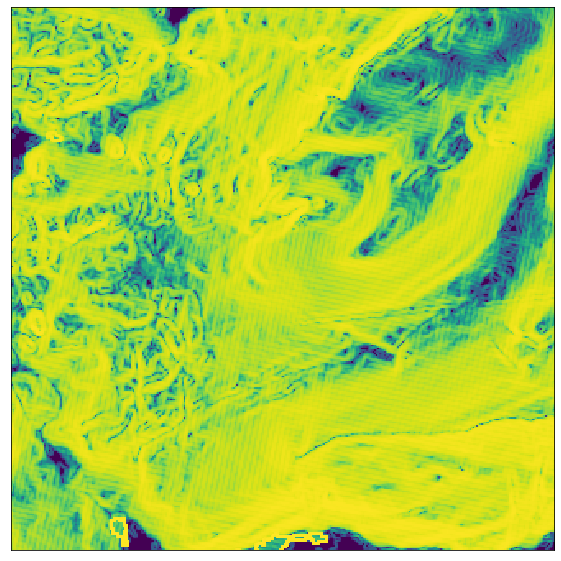

In [127]:
plot_matrix(eo_patch.data_timeless['DEM_SLOPE_LAYER'].squeeze()[1:332,1:332])

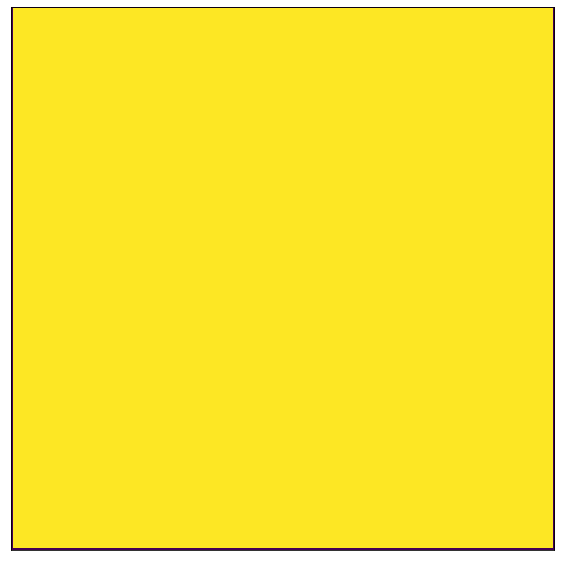

In [128]:
plot_matrix(eo_patch.mask_timeless['DEM_SLOPE_MASK'].squeeze())